# Imports

In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fetch data

In [2]:
#gene_info = pd.read_csv("gene_info_some_genes.txt", sep='\t',header=0)
gene_info = pd.read_csv("gene_info_some_genes_32_Tissue-specific_regulatory_networks_FANTOM5-v1.txt", sep='\t',header=0)
len(gene_info["Gene name"])

632

In [3]:
nbr_genes=len(gene_info["Gene name"])
max_corr=pd.DataFrame(np.zeros([nbr_genes,nbr_genes]), index=gene_info["Gene name"], columns=gene_info["Gene name"])
nbr_signif_corr=pd.DataFrame(np.zeros([nbr_genes,nbr_genes]), index=gene_info["Gene name"], columns=gene_info["Gene name"])
sign_cutoff=0.1550258
gene_index=0
gene_info["Gene name"]
for gene in gene_info["Gene name"]:
    print(gene_index, end="\r")
    gene_folder=glob.glob("correlations/correlations_*_*_"+gene+"/")
    #print(gene_folder)
    if len(gene_folder) ==1 :
        sub_gene_index=0
        for sub_gene in gene_info["Gene name"]:
            sub_gene_file=glob.glob(gene_folder[0]+sub_gene+".csv.gz")
            #print(sub_gene_file)
            if len(sub_gene_file) ==1:
                if len(glob.glob(gene_folder[0]+sub_gene+".csv.gz.info"))==0 :
                    my_data = pd.read_csv(sub_gene_file[0], sep=',',header=0,index_col=0)
                    max_corr.values[gene_index,sub_gene_index]=my_data.abs().max().max()
                    nbr_signif_corr.values[gene_index,sub_gene_index]=np.sum(((my_data.abs())>sign_cutoff).values)
                    with open(sub_gene_file[0]+".info","w+") as f:
                        f.write(str(max_corr.values[gene_index,sub_gene_index])+"\n"+str(nbr_signif_corr.values[gene_index,sub_gene_index]))
                else:
                    with open(sub_gene_file[0]+".info","r") as f:
                        max_corr.values[gene_index,sub_gene_index] = float(f.readline().strip())
                        nbr_signif_corr.values[gene_index,sub_gene_index] = (f.readline().strip())
            sub_gene_index+=1
    gene_index+=1

max_corr.shape
print("Done!")

"""
for gene in sorted(glob.glob("correlations/correlations_*_*_*/")):
    break
    gene_index+=1
max_corr.shape"""

Done!


'\nfor gene in sorted(glob.glob("correlations/correlations_*_*_*/")):\n    break\n    gene_index+=1\nmax_corr.shape'

# Fetch data BIOGRID

In [4]:
biogrid_df = pd.read_csv("../data/BIOGRID-MV-Physical-3.5.171.tab2.txt", sep= "\t")[["Official Symbol Interactor A","Official Symbol Interactor B"]]
nbr_genes=len(gene_info["Gene name"])
interaction_matrix_biogrid=pd.DataFrame(np.zeros([nbr_genes,nbr_genes]), index=gene_info["Gene name"], columns=gene_info["Gene name"])
for index, row in biogrid_df.iterrows():
    #row=row.str.upper()
    #print (row["Official Symbol Interactor A"],row["Official Symbol Interactor B"])
    if gene_info["Gene name"].isin([row["Official Symbol Interactor A"]]).any() and gene_info["Gene name"].isin([row["Official Symbol Interactor B"]]).any():
        interaction_matrix_biogrid.loc[row["Official Symbol Interactor A"],row["Official Symbol Interactor B"]]=1
        interaction_matrix_biogrid.loc[row["Official Symbol Interactor B"],row["Official Symbol Interactor A"]]=1
        #print (row["Official Symbol Interactor A"],row["Official Symbol Interactor B"])


/home/antoine/mit_internship/miniconda3/envs/kipoi-DeepSEA__predict/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,2,14,15,16,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Show data

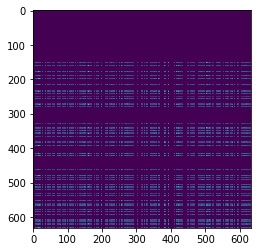

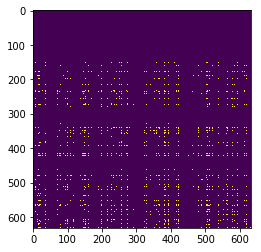

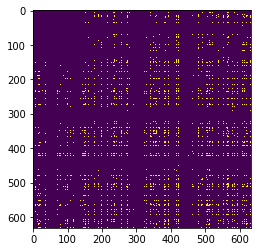

In [5]:
plt.imshow(max_corr.values)
plt.show()
plt.imshow(max_corr.values>0.3)
plt.show()
plt.imshow((max_corr.values>0.3) | np.transpose(max_corr.values>0.3))
plt.show()

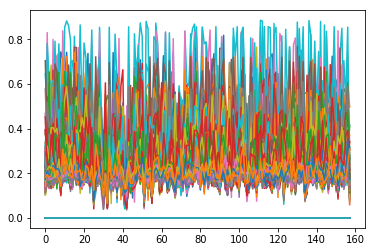

In [6]:
plt.plot(np.delete(max_corr.values,np.where(np.sum(max_corr.values!=0, axis=1)==0),axis=0))
plt.show()

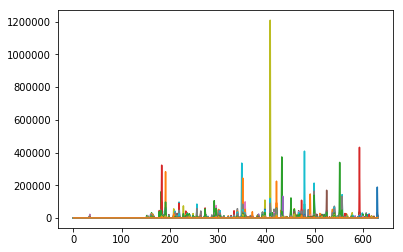

In [7]:
plt.plot(nbr_signif_corr.values)
plt.show()

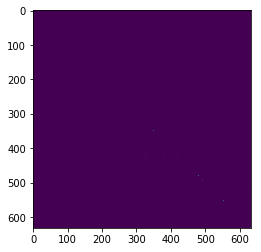

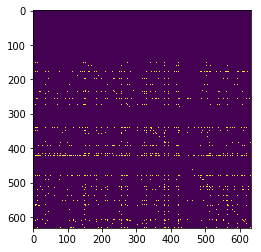

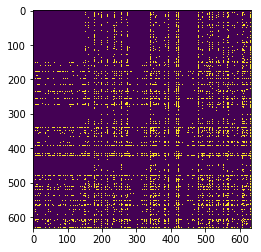

In [8]:
plt.imshow(nbr_signif_corr.values)
plt.show()
plt.imshow(nbr_signif_corr.values>3000)
plt.show()
plt.imshow((nbr_signif_corr.values>1000) | np.transpose(nbr_signif_corr.values>1000))
plt.show()

## Import and define functions

In [9]:
import networkx as nx
from matplotlib import pyplot, patches
import numpy as np

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx-0.5, current_idx-0.5),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)

## Define graph for max_corr

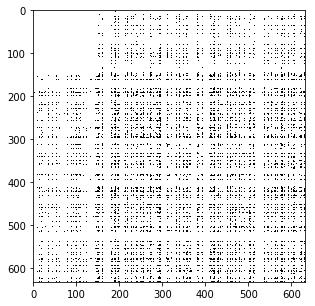

In [10]:
cutoff=0.25
G = nx.from_numpy_matrix((max_corr.values>cutoff) | np.transpose(max_corr.values>cutoff))

draw_adjacency_matrix(G)

## Define graph for nbr_signif_corr

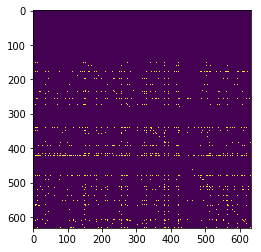

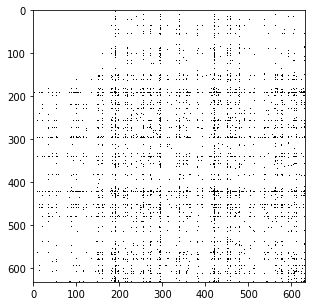

In [11]:
cutoff=3000
G = nx.from_numpy_matrix((nbr_signif_corr.values>cutoff) | np.transpose(nbr_signif_corr.values>cutoff))

plt.imshow(nbr_signif_corr.values>3000)
plt.show()

draw_adjacency_matrix(G)

## Run Louvain on whole data

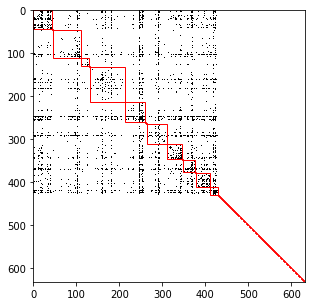

In [12]:
import numpy as np
from collections import defaultdict

import community #https://github.com/taynaud/python-louvain

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
louvain_comms_big=[]
for commun in louvain_comms:
    louvain_comms_big.append(list(nbr_signif_corr.columns[commun]))

In [13]:
#print(louvain_comms)
#print(nbr_signif_corr.columns)
for commun in louvain_comms:
    print(nbr_signif_corr.columns[commun])

Index(['HDX', 'PDX1', 'PRDM4', 'PITX2', 'MEF2D', 'NFIB', 'NFIL3', 'POU2F1',
       'SP4', 'ZNF784', 'IRF4', 'ZNF423', 'PAX3', 'NKX2-5', 'REL', 'LHX4',
       'NFAT5', 'GFI1B', 'HOXB9', 'TFCP2L1', 'SP1', 'MZF1', 'HOXC5', 'CTCF',
       'HINFP', 'FOXJ1', 'POU5F1B', 'TFAP2E', 'HOXB7', 'SOX5', 'CLOCK',
       'CEBPG', 'IRX6', 'HOXB6', 'MAFG', 'POU4F1', 'WT1', 'SOX7', 'HES7',
       'PPARA', 'ZBTB49', 'PKNOX1', 'SOX18', 'SOX7', 'BIN1'],
      dtype='object', name='Gene name')
Index(['LHX8'], dtype='object', name='Gene name')
Index(['EBF1', 'TP63', 'MAFF', 'POU5F1', 'STAT6', 'TGIF1', 'NRF1', 'MGA',
       'BHLHA15', 'POU5F1', 'ZNF350', 'POU5F1', 'BACH1', 'ZNF384', 'ELK3',
       'E4F1', 'CUX1', 'TFCP2', 'E2F8', 'RBPJ', 'SOX15', 'RREB1', 'TP53',
       'ZNF281', 'LMO2', 'NFE2L1', 'FOXP3', 'RUNX3', 'RARG', 'RHOXF1', 'LEF1',
       'CREB3', 'CBX5', 'NFYA', 'NRL', 'GATA6', 'TFEC', 'HOMEZ', 'E2F4',
       'GRHL1', 'AIRE', 'E2F2', 'ZNF143', 'ETV4', 'ZBTB33', 'BHLHE40',
       'POU5F1', 'HSF2', 'HM

## Delete not important data info

In [14]:
genes_to_drop=(max_corr.columns[np.sum(max_corr.values!=0, axis=1)==0])
max_corr=max_corr.drop(genes_to_drop,axis=0).drop(genes_to_drop,axis=1)

genes_to_drop=(nbr_signif_corr.columns[np.sum(nbr_signif_corr.values!=0, axis=1)==0])
nbr_signif_corr=nbr_signif_corr.drop(genes_to_drop,axis=0).drop(genes_to_drop,axis=1)

#np.delete(np.delete(max_corr.values, np.where(np.sum(max_corr.values!=0, axis=1)==0),axis=0), np.where(np.sum(max_corr.values!=0, axis=1)==0),axis=0)
#nbr_signif_corr.values

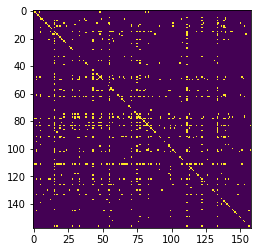

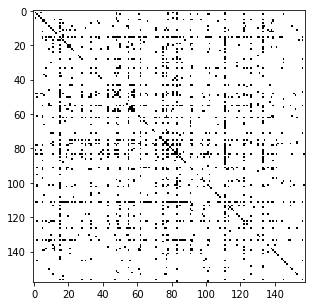

In [15]:
cutoff=11000
G = nx.from_numpy_matrix((nbr_signif_corr.values>cutoff) | np.transpose(nbr_signif_corr.values>cutoff))

plt.imshow(nbr_signif_corr.values>cutoff)
plt.show()

draw_adjacency_matrix(G)

## Run Louvain on part of data

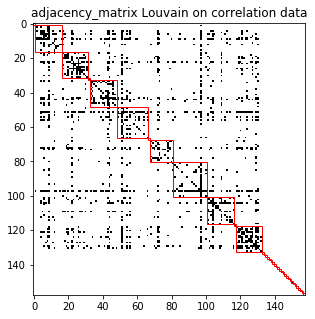

In [16]:
import numpy as np
from collections import defaultdict

import community

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
plt.title("adjacency_matrix Louvain on correlation data")
louvain_comms_small=[]
for commun in louvain_comms:
    louvain_comms_small.append(list(nbr_signif_corr.columns[commun]))

In [17]:
#print(louvain_comms)
#print(nbr_signif_corr.columns)
for commun in louvain_comms:
    if len(commun) != 1 :
        print(nbr_signif_corr.columns[commun])

Index(['PRRX1', 'ESRRB', 'ELF3', 'DMRT1', 'FOXK1', 'TEF', 'OLIG1', 'MEIS2',
       'AIRE', 'HSF4', 'TEAD1', 'ZBTB7C', 'NFATC1', 'EWSR1', 'CREB5', 'MEF2C'],
      dtype='object', name='Gene name')
Index(['PAX3', 'PAX9', 'ZKSCAN3', 'EMX1', 'ZNF740', 'ARHGEF12', 'IRX6',
       'HOXB6', 'HOXA3', 'MYBL2', 'HOXA5', 'HOXA10', 'HOXA4', 'GATA3', 'PAX6'],
      dtype='object', name='Gene name')
Index(['GLIS2', 'NKX2-5', 'POU4F3', 'HLX', 'CREB3L1', 'PAX8', 'CPEB1',
       'ZNF143', 'HSF2', 'CPEB1', 'MNT', 'NR2F2', 'HIC1', 'GLIS2', 'ZBTB49',
       'TFAP2A'],
      dtype='object', name='Gene name')
Index(['LHX2', 'HBP1', 'SOX30', 'OTP', 'TFCP2L1', 'RREB1', 'ERF', 'SPIC',
       'MEF2B', 'ONECUT2', 'STAT3', 'POU4F1', 'KLF4', 'KLF12', 'TCF3', 'ETV7',
       'HBP1', 'BIN1'],
      dtype='object', name='Gene name')
Index(['TFE3', 'ARX', 'IKZF3', 'NR1H4', 'SIX1', 'NR3C2', 'BHLHE40', 'GSX2',
       'ATF4', 'NFKB2', 'PPARG', 'DLX4', 'CEBPD'],
      dtype='object', name='Gene name')
Index(['ETS2', 'CUX1',

In [18]:
community.modularity(louvain_community_dict,G)

0.2958040441111807

In [19]:
#nodes_louvain_ordered

## Run Louvain on BIOGRID data

In [20]:
G = nx.from_numpy_matrix(interaction_matrix_biogrid.values)

"""plt.imshow(nbr_signif_corr.values>cutoff)
plt.show()

draw_adjacency_matrix(G)"""

'plt.imshow(nbr_signif_corr.values>cutoff)\nplt.show()\n\ndraw_adjacency_matrix(G)'

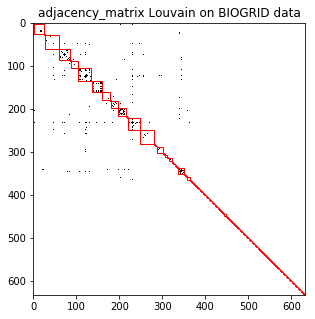

In [21]:
#genes_to_drop=(nbr_signif_corr.columns[np.sum(nbr_signif_corr.values!=0, axis=1)==0])
#interaction_matrix_biogrid=interaction_matrix_biogrid.drop(genes_to_drop,axis=0).drop(genes_to_drop,axis=1)

#G = nx.from_numpy_matrix(interaction_matrix_biogrid.values)

import numpy as np
from collections import defaultdict

import community

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
plt.title("adjacency_matrix Louvain on BIOGRID data")
louvain_comms_biogrid=[]
for commun in louvain_comms:
    louvain_comms_biogrid.append(list(interaction_matrix_biogrid.columns[commun]))

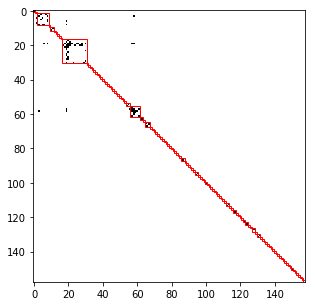

In [22]:
#genes_to_drop=(nbr_signif_corr.columns[np.sum(nbr_signif_corr.values!=0, axis=1)==0])
interaction_matrix_biogrid=interaction_matrix_biogrid.drop(genes_to_drop,axis=0).drop(genes_to_drop,axis=1)

G = nx.from_numpy_matrix(interaction_matrix_biogrid.values)

import numpy as np
from collections import defaultdict

import community

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
louvain_comms_biogrid=[]
for commun in louvain_comms:
    louvain_comms_biogrid.append(list(interaction_matrix_biogrid.columns[commun]))

In [23]:
g = nx.Graph()
g.add_nodes_from(list(biogrid_df["Official Symbol Interactor A"])+list(biogrid_df["Official Symbol Interactor B"]))
for indice, x in biogrid_df.iterrows():
    print(indice,end="\r")
    g.add_edge(x["Official Symbol Interactor A"],x["Official Symbol Interactor B"])

'louvain_comms_biogrid=[]\nfor commun in louvain_comms:\n    louvain_comms_biogrid.append(list(interaction_matrix_biogrid.columns[commun]))'

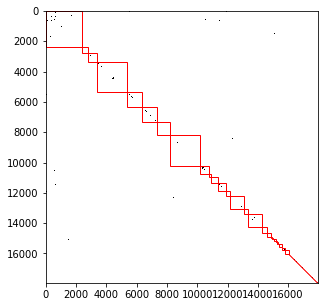

In [24]:
#genes_to_drop=(nbr_signif_corr.columns[np.sum(nbr_signif_corr.values!=0, axis=1)==0])
#interaction_matrix_biogrid=interaction_matrix_biogrid.drop(genes_to_drop,axis=0).drop(genes_to_drop,axis=1)

#G = nx.from_numpy_matrix(interaction_matrix_biogrid.values==1)
G=g
import numpy as np
from collections import defaultdict

import community

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
"""louvain_comms_biogrid=[]
for commun in louvain_comms:
    louvain_comms_biogrid.append(list(interaction_matrix_biogrid.columns[commun]))"""

In [25]:
#print(louvain_comms)

In [26]:
for x in range(len(louvain_comms_biogrid)): 
    if len(louvain_comms_biogrid[x])>1:
        print(x)
        print (louvain_comms_biogrid[x])
        print("")

2
['PAX3', 'STAT1', 'LEF1', 'STAT5A', 'KLF4', 'MEOX1', 'PPARG']

4
['ESRRB', 'TFCP2L1']

10
['ETS2', 'NR5A1', 'SP1', 'TP53', 'NFYA', 'GATA6', 'TEAD1', 'WT1', 'GABPA', 'GATA3', 'ZBTB49', 'TFAP2A', 'SOX18', 'MEF2C']

34
['FOXJ1', 'RFX3']

35
['ELF3', 'AR', 'STAT3', 'NFKB2', 'HIC1', 'PAX6']

36
['NFE2L1', 'MAFG']

38
['HOXA1', 'NFATC1', 'IKZF2']

57
['IRF7', 'IRF7']

64
['MEF2B', 'MEF2A']

81
['HSF4', 'HSF2']

84
['BHLHE40', 'TCF3']

90
['POU4F1', 'EWSR1']

93
['NR2F6', 'NR2F2']

95
['FOXA2', 'HOXA5']



In [27]:
from collections import Counter

for x in range(len(louvain_comms_small)): 
    if len(louvain_comms_small[x])>1:
        for y in louvain_comms_small[x]:
            for i, z in enumerate(louvain_comms_biogrid):
                if y in z:
                    print(i,end= " ")
            print(y,end= " ")
        print("\n")
        
for x in range(len(louvain_comms_small)): 
    if len(louvain_comms_small[x])>1:
        group=[]
        for y in louvain_comms_small[x]:
            for i, z in enumerate(louvain_comms_biogrid):
                if y in z:
                    group.append(i)
        c = Counter( group )
        print(c)
        #print( c.items() )
        #group.sort()
        #print(group)
        print("")

1 PRRX1 4 ESRRB 35 ELF3 43 DMRT1 58 FOXK1 69 TEF 71 OLIG1 72 MEIS2 74 AIRE 81 HSF4 10 TEAD1 88 ZBTB7C 38 NFATC1 90 EWSR1 117 CREB5 10 MEF2C 

2 PAX3 20 PAX9 21 ZKSCAN3 45 EMX1 47 ZNF740 49 ARHGEF12 76 IRX6 86 HOXB6 87 HOXA3 89 MYBL2 95 HOXA5 97 HOXA10 100 HOXA4 10 GATA3 35 PAX6 

5 110 GLIS2 6 NKX2-5 12 POU4F3 16 HLX 33 CREB3L1 55 PAX8 59 92 CPEB1 78 ZNF143 81 HSF2 59 92 CPEB1 102 MNT 93 NR2F2 35 HIC1 5 110 GLIS2 10 ZBTB49 10 TFAP2A 

7 LHX2 14 119 HBP1 15 SOX30 17 OTP 4 TFCP2L1 30 RREB1 39 ERF 63 SPIC 64 MEF2B 79 ONECUT2 35 STAT3 90 POU4F1 2 KLF4 106 KLF12 84 TCF3 113 ETV7 14 119 HBP1 121 BIN1 

9 TFE3 24 ARX 29 IKZF3 48 NR1H4 67 SIX1 83 NR3C2 84 BHLHE40 96 GSX2 98 ATF4 35 NFKB2 2 PPARG 108 DLX4 116 CEBPD 

10 ETS2 18 CUX1 10 NR5A1 10 SP1 27 ISL2 2 STAT1 46 RARG 2 LEF1 10 NFYA 60 FOXD2 61 VSX2 70 SOX8 73 ZBTB6 77 BPTF 80 NKX3-1 93 NR2F6 95 FOXA2 38 IKZF2 101 FOXP1 114 IRF5 

11 MIXL1 19 GFI1B 34 FOXJ1 56 HEY2 62 CLOCK 65 DLX1 66 DLX2 68 118 FOXO6 82 ZEB1 36 MAFG 10 WT1 99 OTX1 104 HES

## Show network

In [28]:
print(nbr_signif_corr.columns)

Index(['SP100', 'PRRX1', 'PAX3', 'LBX2', 'ESRRB', 'GLIS2', 'NKX2-5', 'LHX2',
       'PROX1', 'TFE3',
       ...
       'TFAP2A', 'PAX6', 'CEBPD', 'CREB5', 'SOX18', 'FOXO6', 'HBP1', 'SOX7',
       'BIN1', 'MEF2C'],
      dtype='object', name='Gene name', length=158)


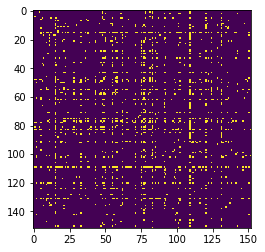

Index(['SP100', 'PRRX1', 'PAX3', 'LBX2', 'ESRRB', 'GLIS2', 'NKX2-5', 'LHX2',
       'PROX1', 'TFE3',
       ...
       'IRF5', 'ZNF232', 'MEF2A', 'TFAP2A', 'PAX6', 'CEBPD', 'CREB5', 'SOX18',
       'BIN1', 'MEF2C'],
      dtype='object', name='Gene name', length=152)
[0, 3, 8, 13, 25, 29, 31, 34, 35, 41, 42, 45, 59, 60, 63, 84, 94, 104, 107, 108, 119, 123, 127, 130, 133, 143, 144]


/home/antoine/mit_internship/miniconda3/envs/kipoi-DeepSEA__predict/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


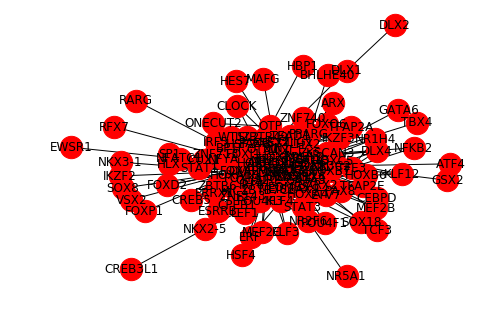

In [29]:
import matplotlib.pyplot as plt
import networkx as nx

def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    #edges = zip(labs[rows.tolist()], labs[cols.tolist()])
    edges = zip(gene_names[rows.tolist()], gene_names[cols.tolist()])
    #print(labs[rows.tolist()])
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, with_labels=True)
    #nx.draw(gr, node_size=500, labels=mylabels, with_labels=True)
    plt.show()

#adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool)
nbr_signif_corr=(nbr_signif_corr.loc[~nbr_signif_corr.duplicated(),~nbr_signif_corr.duplicated()])

adjacency_matrix = (nbr_signif_corr.values>cutoff) | np.transpose(nbr_signif_corr.values>cutoff)
np.fill_diagonal(adjacency_matrix,0)


#adjacency_matrix=np.delete(np.delete(adjacency_matrix,13,axis=0),13,axis=1)
plt.imshow(adjacency_matrix)
plt.show()
genes_to_drop=([np.sum(adjacency_matrix!=0, axis=1)<1])
genes_to_drop=list(np.where(genes_to_drop[0])[0])
#rm FOXA2
#genes_to_drop.append(13)
gene_names=nbr_signif_corr.columns
print(gene_names)
print(genes_to_drop)
gene_names=(gene_names.drop(gene_names[genes_to_drop]))
adjacency_matrix=np.delete(np.delete(adjacency_matrix,genes_to_drop,axis=0),genes_to_drop,axis=1)

genes_to_drop=([np.sum(adjacency_matrix!=0, axis=1)<1])
genes_to_drop=list(np.where(genes_to_drop[0])[0])
gene_names=(gene_names.drop(gene_names[genes_to_drop]))
adjacency_matrix=np.delete(np.delete(adjacency_matrix,genes_to_drop,axis=0),genes_to_drop,axis=1)


show_graph_with_labels(adjacency_matrix)

## Determine cut_off (where modularity is biggest)

## Test consistency of graph

In [30]:
from math import log

def variation_of_information(X, Y):
  n = float(sum([len(x) for x in X]))
  sigma = 0.0
  for x in X:
    p = len(x) / n
    for y in Y:
      q = len(y) / n
      r = len(set(x) & set(y)) / n
      if r > 0.0:
        sigma += r * (log(r / p, 2) + log(r / q, 2))
  return abs(sigma)

In [31]:
"""X1 = [ ["g",2,3,4,5], [6,7,8,9,10] ]
Y1 = [ [6,7,8,9,10], [2,3,4,5] ]
print(variation_of_information(X1, Y1))
# VI = 0"""

'X1 = [ ["g",2,3,4,5], [6,7,8,9,10] ]\nY1 = [ [6,7,8,9,10], [2,3,4,5] ]\nprint(variation_of_information(X1, Y1))\n# VI = 0'

In [32]:
X4 = [ [1,3],[2,4] ]
Y4 = [ [1,2], [3,4]]
print(variation_of_information(X4, Y4))
# VI = 3.322 (maximum VI is log(N) = log(4) = 1.3862943611198906)

2.0


In [33]:
log(4)

1.3862943611198906

2.227408930401065


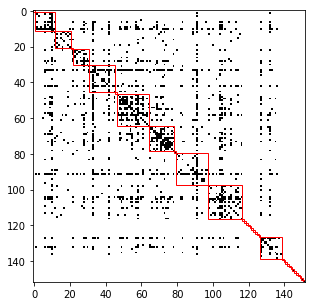

In [62]:
import random
cutoff=11000

G = nx.from_numpy_matrix((nbr_signif_corr.values>cutoff) | np.transpose(nbr_signif_corr.values>cutoff))

#plt.imshow(nbr_signif_corr.values>cutoff)
#plt.show()

#draw_adjacency_matrix(G)

# Run louvain community finding algorithm
louvain_community_dict = community.best_partition(G)

# Convert community assignmet dict into list of communities
louvain_comms = defaultdict(list)
for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
louvain_comms_small_old=louvain_comms_small
louvain_comms_small=[]
for commun in louvain_comms:
    louvain_comms_small.append(list(nbr_signif_corr.columns[commun]))

print(variation_of_information(louvain_comms_small_old, louvain_comms_small))

In [35]:
log(135)

4.90527477843843

In [36]:
print(louvain_comms_big)
print(louvain_comms_small)

[['HDX', 'PDX1', 'PRDM4', 'PITX2', 'MEF2D', 'NFIB', 'NFIL3', 'POU2F1', 'SP4', 'ZNF784', 'IRF4', 'ZNF423', 'PAX3', 'NKX2-5', 'REL', 'LHX4', 'NFAT5', 'GFI1B', 'HOXB9', 'TFCP2L1', 'SP1', 'MZF1', 'HOXC5', 'CTCF', 'HINFP', 'FOXJ1', 'POU5F1B', 'TFAP2E', 'HOXB7', 'SOX5', 'CLOCK', 'CEBPG', 'IRX6', 'HOXB6', 'MAFG', 'POU4F1', 'WT1', 'SOX7', 'HES7', 'PPARA', 'ZBTB49', 'PKNOX1', 'SOX18', 'SOX7', 'BIN1'], ['LHX8'], ['EBF1', 'TP63', 'MAFF', 'POU5F1', 'STAT6', 'TGIF1', 'NRF1', 'MGA', 'BHLHA15', 'POU5F1', 'ZNF350', 'POU5F1', 'BACH1', 'ZNF384', 'ELK3', 'E4F1', 'CUX1', 'TFCP2', 'E2F8', 'RBPJ', 'SOX15', 'RREB1', 'TP53', 'ZNF281', 'LMO2', 'NFE2L1', 'FOXP3', 'RUNX3', 'RARG', 'RHOXF1', 'LEF1', 'CREB3', 'CBX5', 'NFYA', 'NRL', 'GATA6', 'TFEC', 'HOMEZ', 'E2F4', 'GRHL1', 'AIRE', 'E2F2', 'ZNF143', 'ETV4', 'ZBTB33', 'BHLHE40', 'POU5F1', 'HSF2', 'HMX2', 'POU5F1', 'GATA4', 'POU5F1', 'NR2F6', 'POU5F1', 'FOXP1', 'ZNF652', 'PPARG', 'NR2F2', 'GABPA', 'FOXO1', 'ZBTB14', 'TCF3', 'IRF5', 'GATA4', 'NRL', 'E2F2'], ['TBX19',

In [37]:
print(variation_of_information(louvain_comms_big, louvain_comms_small))

1.5205659265755196


In [38]:
print(variation_of_information(louvain_comms_small,louvain_comms_biogrid))

3.8334756681501534


In [39]:
log(19)

2.9444389791664403

In [40]:
louvain_comms_big_filtered=[]
for x in louvain_comms_big:
    for y in x:
        if y not in [item for sublist in louvain_comms_small for item in sublist]:
            x.remove(y)
    if len(x) > 0:
        louvain_comms_big_filtered.append(x)
print(louvain_comms_big_filtered)
print(louvain_comms_small)

[['PDX1', 'PITX2', 'NFIB', 'POU2F1', 'ZNF784', 'ZNF423', 'PAX3', 'NKX2-5', 'LHX4', 'GFI1B', 'HOXB9', 'TFCP2L1', 'SP1', 'HOXC5', 'HINFP', 'FOXJ1', 'TFAP2E', 'HOXB7', 'CLOCK', 'IRX6', 'HOXB6', 'MAFG', 'POU4F1', 'WT1', 'SOX7', 'HES7', 'PPARA', 'ZBTB49', 'SOX18', 'SOX7', 'BIN1'], ['TP63', 'TGIF1', 'MGA', 'ZNF384', 'E4F1', 'CUX1', 'E2F8', 'SOX15', 'RREB1', 'TP53', 'LMO2', 'NFE2L1', 'RUNX3', 'RARG', 'LEF1', 'CBX5', 'NFYA', 'GATA6', 'HOMEZ', 'GRHL1', 'AIRE', 'ZNF143', 'ZBTB33', 'BHLHE40', 'HSF2', 'HMX2', 'POU5F1', 'POU5F1', 'NR2F6', 'POU5F1', 'FOXP1', 'ZNF652', 'PPARG', 'NR2F2', 'GABPA', 'ZBTB14', 'TCF3', 'IRF5', 'GATA4', 'NRL'], ['ESR2', 'MYBL1', 'AHR', 'SOX30', 'VDR', 'BRCA1', 'NR5A1', 'SOX8', 'BPTF', 'TCF7L2', 'STAT3'], ['BACH2', 'MYF6', 'SP100', 'PRRX1', 'MAX', 'ZNF524', 'ESRRA', 'POU3F1', 'SOX4', 'SRF', 'MYEF2', 'ESRRB', 'TFE3', 'ETS2', 'HBP1', 'ZSCAN26', 'PAX9', 'ZKSCAN3', 'TCF7', 'CREB3L1', 'ZNF282', 'ERF', 'DMRT1', 'REST', 'EMX1', 'SPDEF', 'TBX21', 'ZNF691', 'ITGB2', 'ATF2', 'TCF7L1',

In [41]:
print(variation_of_information(louvain_comms_big_filtered, louvain_comms_small))

3.2927355617937293


In [42]:
log(19)

2.9444389791664403

In [43]:
sum(sum(nbr_signif_corr.values>3000))/(19*19)

10.808864265927978

[0, 1, 4, 27, 40, 44, 48, 53, 65, 81, 83, 103, 2, 9, 51, 54, 61, 95, 121, 142, 147, 3, 5, 6, 12, 37, 66, 97, 120, 135, 138, 7, 14, 15, 17, 18, 64, 72, 82, 87, 88, 129, 131, 140, 145, 150, 8, 10, 28, 33, 36, 47, 49, 56, 57, 58, 69, 71, 77, 100, 122, 124, 139, 141, 149, 11, 19, 20, 21, 43, 46, 50, 85, 91, 99, 111, 113, 117, 136, 13, 16, 23, 24, 38, 67, 68, 79, 89, 90, 101, 106, 109, 115, 118, 134, 137, 148, 151, 22, 26, 30, 32, 39, 52, 55, 75, 86, 92, 93, 98, 102, 110, 114, 116, 128, 132, 146, 25, 29, 31, 34, 35, 41, 42, 45, 59, 60, 62, 70, 73, 74, 76, 78, 80, 96, 105, 112, 125, 126, 63, 84, 94, 104, 107, 108, 119, 123, 127, 130, 133, 143, 144]


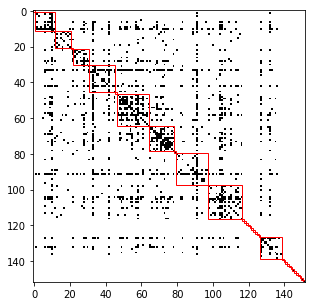

In [63]:
nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]
draw_adjacency_matrix(G, nodes_louvain_ordered, [louvain_comms], ["red"])
print((nodes_louvain_ordered))

# Test for patient community detection based on expression

In [94]:
import pandas as pd
import numpy as np
#gene_expr = pd.read_csv("expression_some_genes_32_Tissue-specific_regulatory_networks_FANTOM5-v1.tsv", sep='\t',header=0,index_col=0)
gene_expr = pd.read_csv("../data/geuvadis_expression/GD462.GeneQuantRPKM.50FN.samplename.resk10.txt.gz", sep='\t',header=0,index_col=0)
gene_expr=gene_expr.drop(['Gene_Symbol', 'Chr', 'Coord'],axis=1)
nbr_cluster=7
cluster_mean=np.zeros([nbr_cluster,gene_expr.shape[0]])
nbr_individuals=gene_expr.shape[1]
#individual_clusters=np.arange(nbr_individuals)%7
individual_clusters=np.round((np.arange(462)+1)/66-0.5).astype(int)
individual_clusters_old=np.zeros(nbr_individuals)
#print(nbr_cluster, nbr_individuals,individual_clusters)

In [79]:
nbr_boucle=0
while not (individual_clusters==individual_clusters_old).all() :
    nbr_boucle+=1
    individual_clusters_old=np.copy(individual_clusters)
    for x, y in enumerate(cluster_mean):
        cluster_mean[x]=np.mean(gene_expr.values[:,individual_clusters==x],axis=1)
        #print((cluster_mean[x]))
    for x, y in enumerate(individual_clusters):
        individual_clusters[x]=np.argmin([np.linalg.norm(gene_expr.values[:,x]-cluster_mean[cluster]) for cluster in range(nbr_cluster)])
        #individual_clusters[x]=
    print((individual_clusters==individual_clusters_old).all())

print(nbr_boucle)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
16


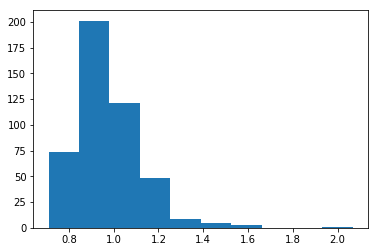

In [109]:
import matplotlib.pyplot as plt
plt.hist(np.std(gene_expr.values,axis=0))
plt.show()

In [81]:
#individual_clusters1=(individual_clusters)

In [96]:
for x in range(len(gene_expr.index)):
    gene_expr.rename(index={gene_expr.index[x]:gene_expr.index[x].split('.')[0]}, inplace=True)
    line=np.where(gene_info.values[:,0]==gene_expr.index[x])
    if(len((line)[0])>0):
        gene_expr.rename(index={gene_expr.index[x]:gene_info.values[line[0][0],5]}, inplace=True)
        #gene_expr.index[x]=gene_info.values[,5]

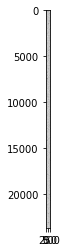

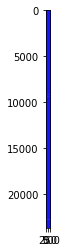

In [97]:
x=gene_expr.values
x=np.transpose(np.transpose(x)-x.mean(axis=1))
x=np.transpose(np.transpose(x)/x.std(axis=1))
pyplot.imshow(x,
              cmap="Greys",
              interpolation="none")
plt.show()
pyplot.imshow(gene_expr.values,
              cmap="bwr",
              interpolation="none")
plt.show()
gene_expr=pd.DataFrame(x,columns=gene_expr.columns,index=gene_expr.index)

In [98]:
def mean_distance(kmeans, values):
    kmeans.labels_, kmeans.cluster_centers_
    distance=0
    for x in range(len(kmeans.labels_)):
        distance+=np.linalg.norm(values[x]-kmeans.cluster_centers_[kmeans.labels_[x]])
    return distance

In [106]:
nbr_cluster=100
from sklearn.cluster import KMeans, AgglomerativeClustering
nbr_tries=3
kmeans = KMeans(n_clusters=nbr_cluster).fit(gene_expr.T)
distance = mean_distance(kmeans, gene_expr.T.values)
for x in range(nbr_tries):
    kmeans_temp = KMeans(n_clusters=nbr_cluster).fit(gene_expr.T)
    distance_temp = mean_distance(kmeans_temp, gene_expr.T.values)
    if distance_temp<distance:
        distance=distance_temp
        kmeans=kmeans_temp
ward = AgglomerativeClustering(n_clusters=nbr_cluster, linkage='ward').fit(gene_expr.T)
individuals_sorted_ward=sorted(range(len(ward.labels_)), key=lambda k: ward.labels_[k])
individuals_sorted_kmeans=sorted(range(len(kmeans.labels_)), key=lambda k: kmeans.labels_[k])

/home/antoine/mit_internship/miniconda3/envs/kipoi-DeepSEA__predict/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


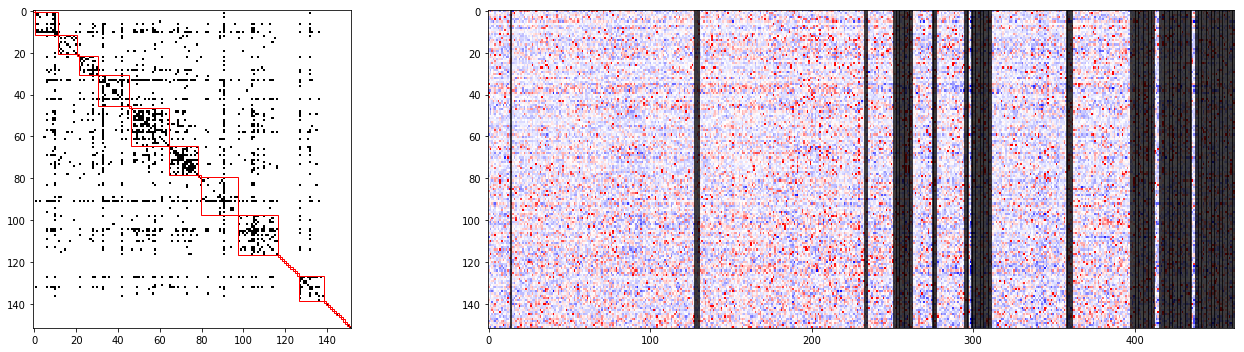

In [107]:
(G, node_order, partitions, colors)=(G, nodes_louvain_ordered, [louvain_comms], ["red"])
from matplotlib.gridspec import GridSpec
adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

#Plot adjacency matrix in toned-down black and white
fig = pyplot.figure(figsize=(20, 5)) # in inches
gs = GridSpec(2, 1, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
plt.subplot(121)
pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")


# The rest is just if you have sorted nodes by a partition and want to
# highlight the module boundaries
assert len(partitions) == len(colors)
ax = pyplot.gca()
for partition, color in zip(partitions, colors):
    current_idx = 0
    for module in partition:
        ax.add_patch(patches.Rectangle((current_idx-0.5, current_idx-0.5),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
        current_idx += len(module)

ax1 = fig.add_subplot(gs[1:, 0])
plt.subplot(122)
adjacency_matrix = gene_expr.loc[nbr_signif_corr.index[nodes_louvain_ordered]].iloc[:,individuals_sorted_kmeans].values
pyplot.imshow(np.clip((adjacency_matrix),-3,3),
              interpolation="none",
              cmap="bwr",
             aspect='auto')

"""pyplot.imshow(abs(np.clip((adjacency_matrix),-3,3)),
              interpolation="none",
              cmap="inferno",
             aspect='auto')"""


xline=0
for x in np.unique(kmeans.labels_, return_counts=True)[1]:
    xline+=x
    plt.axvline(x=xline-1, color='k')

fig.tight_layout()
fig.show()
#plt.show()

In [73]:
gene_expr.shape

(393, 462)

In [60]:
nbr_signif_corr.index[nodes_louvain_ordered]

Index(['SP100', 'PRRX1', 'SOX30', 'PAX9', 'NR5A1', 'IKZF3', 'CREB3L1', 'FOXJ1',
       'STAT1', 'NFE2L1',
       ...
       'SPIC', 'DLX2', 'FOXO6', 'ZBTB6', 'AIRE', 'BPTF', 'NR3C2', 'FOXA2',
       'ATF4', 'CEBPD'],
      dtype='object', name='Gene name', length=152)

normalized mutual information

deribayesian
kmeans for all genes (not only interesting ones)
factorisation 

In [123]:
network_compendium = pd.read_csv("../data/Network_compendium/Tissue-specific_regulatory_networks_FANTOM5-v1/32_high-level_networks/05_sarcoma.txt.gz", sep='\t', header=None)
#10_lymphocytes.txt.gz
#11_myeloid_leukocytes.txt.gz

In [124]:
network_compendium

,0,1,2
0,CTCF,SLC35E3,0.006853
1,KLF4,SUSD4,0.000293
2,MAFG,C1orf74,0.001333
3,CEBPA,TMEM60,0.000914
4,IRF8,CTSW,0.001766
5,KLF4,TMIGD2,0.010310
6,TP53,XG,0.000620
7,MYEF2,CD52,0.007727
8,NFE2L1,ITPKB,0.006220
9,ETS2,TENC1,0.074133
